In [ ]:
import sys
sys.modules[__name__].__dict__.clear()

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.compat import platform
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
import scipy.stats as stats
from sklearn.covariance import MinCovDet
from sklearn.covariance import LedoitWolf
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

In [2]:
df= pd.read_csv('FIFA19.csv')
na = pd.notnull(df["Position"])
df = df[na]
df= df[['Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','Position']]

In [3]:
x = (df.drop("Position", axis=1).values)
y = df["Position"].values

#wine dataset

In [117]:
from sklearn.datasets import load_wine
wine = load_wine()
x = pd.DataFrame(wine.data, columns=wine.feature_names).values
Y = pd.Categorical.from_codes(wine.target, wine.target_names)
y= [i for i in Y]

In [133]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

#iris setosa dataset


In [129]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data # we only take the first two features.
y = iris.target

In [135]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [130]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#Fifa dataset
Se clasifican las categorias

In [4]:
gk = ["GK"]
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

categories= [gk, forward_player, midfielder_player, defender_player]
categ= ['gk', 'forward_player','midfielder_player', 'defender_player']

In [5]:
#transforming y into the four categories
for i in range(len(categories)):
  for j in range(len(y)):
    if y[j] in categories[i]:
      y[j]=categ[i]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

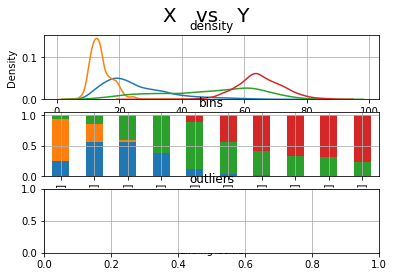

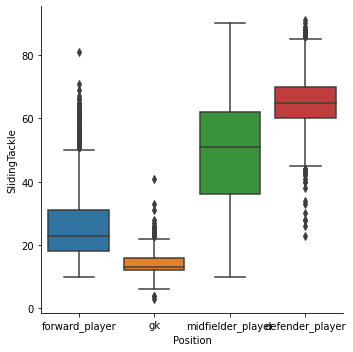

In [ ]:
cat, num = "Position", "SlidingTackle"
fig, ax = plt.subplots(nrows=3, ncols=1,  sharex=False, sharey=False)
fig.suptitle('X' + "   vs   " + 'Y', fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(df[num], q=np.linspace(0,1,11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)

### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=df, kind="box", ax=ax[2])
ax[2].grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

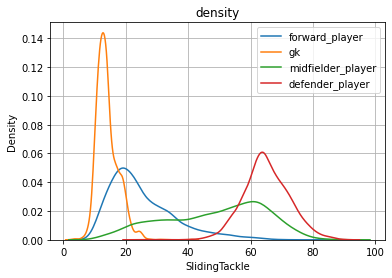

In [ ]:
plt.figure()      
### distribution
plt.title('density')
for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label=i)
plt.grid(True)
plt.legend()
plt.show()

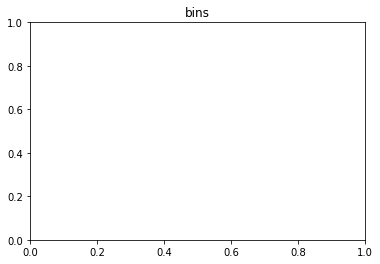

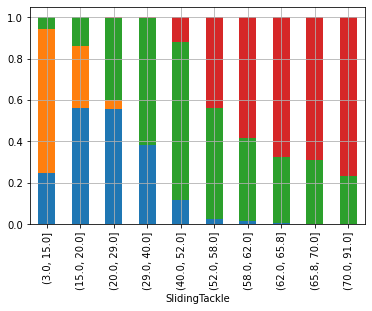

In [ ]:
### stacked
plt.title('bins')
breaks = np.quantile(df[num], q=np.linspace(0,1,11))
tmp = df.groupby([cat, pd.cut(df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=False, grid=True)

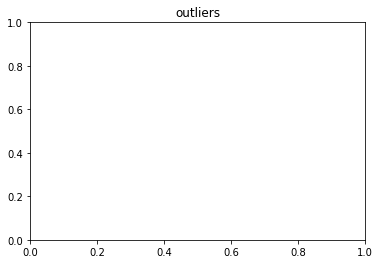

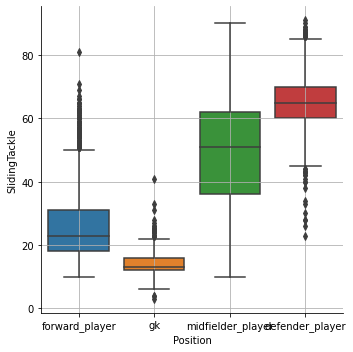

In [ ]:
### boxplot   
plt.figure()
plt.title('outliers')
sns.catplot(x=cat, y=num, data=df, kind="box")
plt.grid(True)
plt.show()

In [118]:
df_train, df_test = model_selection.train_test_split(df,test_size=0.3)

33 33


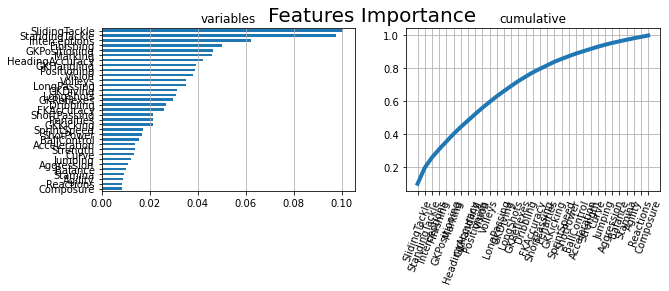

In [127]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3)

x1 = df_train.drop("Position", axis=1).values
y1 = df_train["Position"].values

feature_names = df_train.drop("Position", axis=1).columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(x1,y1)
importances = model.feature_importances_

print(len(feature_names), len(importances))

## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10,3))
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

4 4


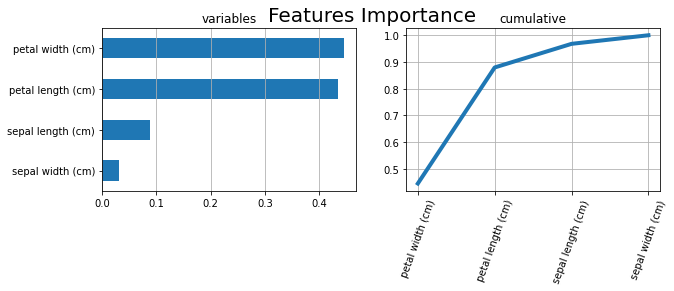

In [136]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3)

x1 = x_train
y1 = y_train


feature_names = iris.feature_names
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(x1,y1)
importances = model.feature_importances_

print(len(feature_names), len(importances))

## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10,3))
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [126]:
x_train

array([[1.282e+01, 3.370e+00, 2.300e+00, ..., 7.200e-01, 1.750e+00,
        6.850e+02],
       [1.208e+01, 1.330e+00, 2.300e+00, ..., 1.070e+00, 3.210e+00,
        6.250e+02],
       [1.364e+01, 3.100e+00, 2.560e+00, ..., 9.600e-01, 3.360e+00,
        8.450e+02],
       ...,
       [1.410e+01, 2.020e+00, 2.400e+00, ..., 1.070e+00, 2.750e+00,
        1.060e+03],
       [1.356e+01, 1.730e+00, 2.460e+00, ..., 9.800e-01, 3.030e+00,
        1.120e+03],
       [1.296e+01, 3.450e+00, 2.350e+00, ..., 6.800e-01, 1.750e+00,
        6.750e+02]])

#EDA

#Robust LDA

In [6]:
#Desviación estándar robusta
def robust_std(lista):
  aux= [np.abs(i - np.median(lista)) for i in lista]
  return np.median(aux)

def std_pearson(lista1,lista2):
  lista1= np.array(lista1)
  lista2= np.array(lista2)
  return np.median( np.dot(abs(lista1-np.median(lista1)),abs(lista2-np.median(lista2).T )) )

#Calcula la covarianza entre dos vectores
def corr_cov(a,b, metodo):
  if metodo=='Kendall':
    tau,_ = stats.kendalltau(a, b)
    cov= tau*robust_std(a)*robust_std(b)
  elif metodo== 'Spearman':
    sp,_ =stats.spearmanr(a,b)
    cov= sp*robust_std(a)*robust_std(b)
  elif metodo=='Pearson r':
    cij= std_pearson(a,b)
    cii= std_pearson(a,a)
    cjj= std_pearson(b,b)
    p= cij/(np.sqrt(cii*cjj))
    cov= p*robust_std(a)*robust_std(b)
  return cov


def matriz_cov_coefs(matriz, metodo):
  matriz= np.array(matriz)
  if metodo=='Pearson r':
    _,c= matriz.shape
    corr= np.zeros((c,c))
    for i in range(c):
      for j in range(i,c):
        corr[i,j] = corr_cov(matriz[:,i],matriz[:,j], metodo)
        corr[j,i] = corr[i,j]
  else:
    corr=pd.DataFrame(matriz).corr(method=metodo).values
    _,c= corr.shape
    for i in range(c):
      for j in range(i,c):
        corr[i,j]=  corr[i,j] * robust_std(matriz[:,i])*robust_std(matriz[:,j])
        corr[j,i]= corr[i,j]
  return corr

def matriz_cov_MCD(matriz):
  return MinCovDet(random_state=0).fit(matriz).covariance_

def matriz_cov_shrinkages(matriz):
  return LedoitWolf().fit(matriz).covariance_


def matriz_covarianza(matriz, metodo):
  if metodo=='kendall' or metodo=='spearman' or metodo=='pearson':
    return matriz_cov_coefs(matriz, metodo)
  elif metodo== 'Pearson r':
    return matriz_cov_coefs(matriz, metodo)
  elif metodo=='fastMCD':
    return matriz_cov_MCD(matriz)
  elif metodo== 'Shrinkages':
    return matriz_cov_shrinkages(matriz)
  else:
    print('Método incorrecto, disponibles: Kendall, Spearman, Pearson, fastMCD, Shrinkages')

In [7]:
# Standarization: (A[i,j]-mu[j])/sigma[j]
def standardization1(matriz):
  matriz_stand= np.zeros((len(matriz), len(matriz[0])))
  for i in range(len(matriz[0])):
    desv= robust_std(matriz[:,i])
    aveg= np.mean(matriz[:,i])
    for j in range(len(matriz)):
      matriz_stand[j,i]= (matriz[j,i]- aveg)/desv
  return matriz_stand

In [8]:
# Robust Standardization
from sklearn.preprocessing import RobustScaler
def standardization(matriz):
  transformer = RobustScaler().fit(matriz)
  return transformer.transform(matriz)

In [9]:
def suma_covarianzas(covs):
  sumcov= covs[0]
  for i in range(1, len(covs)):
    sumcov= np.add(sumcov,covs[i])
  return sumcov

In [10]:
def clase(x,y):
  
  clases=[y[0]]
  
  for i in y:
    if i not in clases:
      clases.append(i)
  
  grupos= [[] for i in range(len(clases))]

  for i in range(len(clases)):
    for j in range(len(y)):
      if y[j]==clases[i]:
        grupos[i].append(x[j])

  #Se calcula la media a cada variable de cada poblacion
  medias= []
  for i in grupos:
    medias.append(np.mean(i,axis=0))

  return grupos, medias, clases


In [11]:
def robust_LDA(x,y, metodo):

  grupos,m, clas=clase(x, y)

  covs= [matriz_covarianza(np.array(grupos[i]), metodo) for i in range(len(grupos))]
  covs= np.array(covs)

  sigmaM= suma_covarianzas(covs)

  pi= [len(i)/len(x) for i in grupos]

  covB2= matriz_covarianza(np.array(m), metodo)
  
  if len(grupos)==2:
    sigmaB= [m1-m2 for m1,m2 in zip(m[0],m[1])]
    b= np.dot(np.linalg.pinv(sigmaM),np.array(sigmaB).T)
    pi1= len(grupos[0])/len(x)
    pi2= len(grupos[1])/len(x)
    b0= -(1/2)* ( np.dot(np.dot(m[0].T,np.linalg.pinv(sigmaM)),m[0]) - np.dot(np.dot(m[1].T,np.linalg.pinv(sigmaM)),m[1]) ) + np.log(pi2/pi1) 
    return grupos,m, clas,b0, b
  else:
    return grupos,m,clas,covs

In [12]:
def LDA_reduction(x,y, metodo, porc_explicado):

  grupos,m, clas=clase(x, y)
  covs= [matriz_covarianza(np.array(grupos[i]), metodo) for i in range(len(grupos))]
  covs= np.array(covs)

  sigmaM= suma_covarianzas(covs)

  covB2= matriz_covarianza(np.array(m), metodo)

  eigen_values, eigen_vectors = np.linalg.eig(np.linalg.pinv(sigmaM).dot(covB2))

  pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
  pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

  #como es dificil determinar cuanto explica con los valores generados anteriormente 
  #por lo que se expresa en porcentajes

  eigen_value_sums = sum(eigen_values)

  eigen_value_sums = sum(eigen_values)
  eigen_exp=[]
  var_exp=[]

  porc=0
  #print('Explained Variance')
  for i, pair in enumerate(pairs):
    
    #print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))
    var_exp.append((pair[0]/eigen_value_sums).real)
    porc+= pair[0]/eigen_value_sums
    if porc< porc_explicado:
      eigen_exp.append(i)
  
  cum_var_exp = np.cumsum(var_exp)

  '''
  # plot explained variances
  plt.bar(range(1,34), var_exp, alpha=0.5,
          align='center', label='individual explained variance')
  plt.step(range(1,34), cum_var_exp, where='mid',
          label='cumulative explained variance')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal component index')
  plt.legend(loc='best')
  plt.show() 
  '''

  lda = LinearDiscriminantAnalysis()
  X_lda = lda.fit_transform(x, y)


  w_matriz= np.zeros( ( len(pairs[0][1]),len(eigen_exp) ) )
  for i in range(len(eigen_exp)):
    for j in range(len(pairs[0][1])):
      w_matriz[j,i]= pairs[eigen_exp[i]][1][j]

  w_matriz= w_matriz.real

  x_lda = np.array(np.array(x).dot(w_matriz))

  return X_lda

In [13]:
def LDA_reduction1(x,y):

  lda = LinearDiscriminantAnalysis()
  X_lda = lda.fit_transform(x, y)

  return X_lda

In [14]:
def robust_LDA2(x_train,y, metodo, porc_explicado):

  x= LDA_reduction(x_train,y,metodo, porc_explicado)

  grupos,m, clas=clase(x, y)

  covs= [matriz_covarianza(np.array(grupos[i]), metodo) for i in range(len(grupos))]
  covs= np.array(covs)

  sigmaM= suma_covarianzas(covs)

  if len(grupos)==2:
    sigmaB= [m1-m2 for m1,m2 in zip(m[0],m[1])]
    b= np.dot(np.linalg.pinv(sigmaM),np.array(sigmaB).T)
    pi1= len(grupos[0])/len(x)
    pi2= len(grupos[1])/len(x)
    b0= -(1/2)* ( np.dot(np.dot(m[0].T,np.linalg.pinv(sigmaM)),m[0]) - np.dot(np.dot(m[1].T,np.linalg.pinv(sigmaM)),m[1]) ) + np.log(pi2/pi1) 
    return grupos,m, clas,b0, b
  else:
    return grupos,m,clas,covs

In [15]:
def predict(x_test,grups, m, clas, b0=None, b=None, covs=None):
  y_pred= np.zeros(len(x_test))
  if len(clas)==2:
    for i in range(len(x_test)):
      L= b0 + np.dot(b.T,x_test[i])
      if L>0:
        y_pred[i]=(int(0))
      else:
        y_pred[i]=(int(1))
  else:
    p= [len(grups[i])/len(x_test) for i in range(len(grups)) ]
    for j in range(len(x_test)):
      l= [ np.log(p[i]) -(1/2)*np.log(np.linalg.det(covs[i])) -(1/2)* np.dot(np.dot(np.array(m[i]).T,np.linalg.pinv(covs[i])),m[i]) + np.dot(np.dot(np.array(m[i]).T,np.linalg.pinv(covs[i])), x_test[j]) -(1/2)*np.dot(np.dot(np.array(x_test[j]).T,np.linalg.pinv(covs[i])),x_test[j]) for i in range(len(m))  ]
      y_pred[j]= np.argmax(l)
  return y_pred

In [16]:
def convert(y_test, clas):

  for i in range(len(clas)):
    for j in range(len(y_test)):
      if y_test[j]==clas[i]:
        y_test[j] = int(i)

  return y_test

In [17]:
def diferent_class(y):
  aux= [y[0]]
  cont=1
  for i in range(1,len(y)):
    if y[i] not in aux:
      aux.append(y[i])
      cont+=1
  return cont

In [82]:
x_estand= standardization(x)

#Metricas

In [ ]:
# Functions to compute True Positives, True Negatives, False Positives and False Negatives
def TP(y_true, y_pred):
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
      tp += 1
  return tp

def true_negative(y_true, y_pred):
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0:
      tn += 1
      return tn

In [19]:
def aciertos(y_test, y_predic):
  cont=0
  for i in range(len(y_test)):
    if int(y_test[i])==int(y_predic[i]):
      cont+=1
  
  return cont

In [88]:
n=20

auc= np.zeros(n)
acc= np.zeros(n)

#for multiclass
scores=np.zeros(n)
scores2=np.zeros(n)
scores3=np.zeros(n)
scores4=np.zeros(n)
scores5=np.zeros(n)
scores6=np.zeros(n)
l1=np.zeros(n)
l2= np.zeros(n)
l3= np.zeros(n)
l4= np.zeros(n)
l5= np.zeros(n)
l6= np.zeros(n)
for i in range(n):
  
  x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3)
  x_tr = LDA_reduction1(x_train,y_train)
  x_te = LDA_reduction1(x_test,y_test)

  num_clases= diferent_class(y_train)

  if num_clases==2:
    print(i)
    grups, m, clas, b0,b =robust_LDA(x_train,y_train,'Shrinkages')
    Prediction = predict(x_test, grups, m,clas, b0=b0, b=b)  
    y_test= convert(y_test,clas)

    y_true= [int(i) for i in y_test]
    y_score= [int(i) for i in Prediction]
  

    fpr, tpr, threshold = metrics.roc_curve(np.array(y_true),np.array(y_score))
    roc_auc = metrics.auc(fpr, tpr)
    auc[i]=(roc_auc)
    acc[i]=(accuracy_score(np.array(y_true),np.array(y_score)))

  else:
    print(i)
    grups,m,clas,covs = robust_LDA(x_train,y_train,'Shrinkages')
    Prediction = predict(x_test, grups, m,clas,covs=covs) 
    y_test= convert(y_test,clas)

    y_true= [int(i) for i in y_test]
    y_score= [int(i) for i in Prediction]

    _,_,_,covs2 = robust_LDA(x_train,y_train,'fastMCD')
    Prediction2 = predict(x_test, grups, m,clas,covs=covs2) 
    y_test= convert(y_test,clas)
    y_score2= [int(i) for i in Prediction2]


    _,_,_,covs3 = robust_LDA(x_train,y_train,'kendall')
    Prediction3 = predict(x_test, grups, m,clas,covs=covs3) 
    y_test= convert(y_test,clas)
    y_score3= [int(i) for i in Prediction3]

    _,_,_,covs4 = robust_LDA(x_train,y_train,'spearman')
    Prediction4 = predict(x_test, grups, m,clas,covs=covs4) 
    y_test= convert(y_test,clas)
    y_score4= [int(i) for i in Prediction]

    _,_,_,covs5 = robust_LDA(x_train,y_train,'Pearson r')
    Prediction4 = predict(x_test, grups, m,clas,covs=covs5) 
    y_test= convert(y_test,clas)
    y_score5= [int(i) for i in Prediction]


          
  y_test= convert(y_test,clas)
  model = LinearDiscriminantAnalysis()
  model.fit(x_train,y_train)
  yhat= model.predict(x_test)
  yhat= convert(yhat,clas)
  yhat=[int(i) for i in yhat]

  l1[i] = aciertos(y_true, y_score)/len(y_true)
  l2[i] = aciertos(y_true, y_score2)/len(y_true)
  l3[i] = aciertos(y_true, y_score3)/len(y_true)
  l4[i] = aciertos(y_true, y_score4)/len(y_true)
  l5[i] = aciertos(y_true, y_score5)/len(y_true)
  l6[i] = aciertos(y_true, yhat)/len(y_true)
  scores[i]=f1_score(y_true, y_score, average='weighted')
  scores2[i]=f1_score(y_true, y_score2, average='weighted')
  scores3[i]=f1_score(y_true, y_score3, average='weighted')
  scores4[i]=f1_score(y_true, y_score4, average='weighted')
  scores5[i]=f1_score(y_true, y_score5, average='weighted')
  scores6[i]=f1_score(y_true, yhat, average='weighted')



0


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


1


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


2


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-16.483300520801585 > -84.820043031444584). You may want to try with a higher value of support_fraction (current value: 0.564).
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


3


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"


4


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


5


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


6


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-17.263313992909975 > -85.364325886082639). You may want to try with a higher value of support_fraction (current value: 0.576).
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-17.286481043266136 > -85.470420193557032). You may want to try with a higher value of support_fraction (current value: 0.576).
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-17.298867421895498 > -85.644772306152035). You may want to try with a higher value of support_fraction (current value: 0.576).
  RuntimeWarning,
/usr/local/lib/p

7


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


8


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


9


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


10


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


11


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


12


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


13


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


14


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"


15


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


16


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


17


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-16.541290518993740 > -86.627025930791348). You may want to try with a higher value of support_fraction (current value: 0.568).
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


18


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-17.753568294971693 > -86.657001467223097). You may want to try with a higher value of support_fraction (current value: 0.588).
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


19


/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


In [89]:
np.mean(scores), np.mean(scores2), np.mean(scores3),np.mean(scores4),np.mean(scores5),np.mean(scores6)-0.001

(0.7440825191219607,
 0.7288566033998165,
 0.3669989216047883,
 0.7440825191219607,
 0.7440825191219607,
 0.9758442101439202)

In [79]:
np.sum(l3), np.sum(l6)

(11.177777777777777, 17.288888888888888)

Text(0.5, 1.0, 'f1 scores en iteraciones')

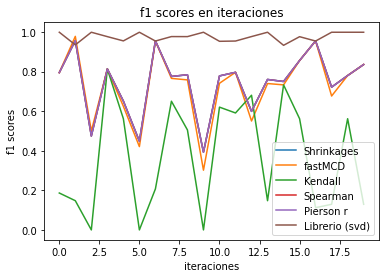

In [90]:
seq= [i for i in range(len(scores))]
plt.plot(seq,scores,seq,scores2, seq,scores3,seq,scores4,seq,scores5,seq,scores6-0.001)
plt.legend(['Shrinkages','fastMCD', 'Kendall','Spearman','Pierson r', 'Librerio (svd)'])
plt.xlabel('iteraciones')
plt.ylabel('f1 scores')
plt.title('f1 scores en iteraciones')

In [75]:
scores6[0]

1.0

In [22]:
f1_score(y_true, y_score, average='weighted'), f1_score(y_true, yhat, average='weighted')

(0.8569129238672292, 0.8539663928940935)

(array([0.85674931, 0.86023875, 0.85895317, 0.85730028, 0.85307622,
        0.85399449, 0.85748393, 0.85601469, 0.85289256, 0.85950413,
        0.85913682, 0.85656566, 0.84940312, 0.84738292, 0.85454545,
        0.85803489, 0.86152433, 0.8543618 , 0.85895317, 0.85730028]),
 array([0.85766758, 0.85876951, 0.85601469, 0.85270891, 0.85197429,
        0.85289256, 0.85546373, 0.856382  , 0.84885216, 0.856382  ,
        0.85509642, 0.85381084, 0.84848485, 0.84885216, 0.8523416 ,
        0.85491276, 0.86042241, 0.85160698, 0.85766758, 0.85546373]),
 array([0.86078972, 0.86134068, 0.86078972, 0.86115702, 0.85730028,
        0.856382  , 0.8584022 , 0.86134068, 0.85197429, 0.86060606,
        0.85876951, 0.85895317, 0.85160698, 0.84958678, 0.85454545,
        0.86023875, 0.86574839, 0.85399449, 0.86299357, 0.85748393]),
 array([0.85674931, 0.86023875, 0.85895317, 0.85730028, 0.85307622,
        0.85399449, 0.85748393, 0.85601469, 0.85289256, 0.85950413,
        0.85913682, 0.85656566, 0.84940312

In [ ]:
scores,scores2,scores3,scores4,scores5

(array([0.85472911]),
 array([0.85399449]),
 array([0.85730028]),
 array([0.85472911]),
 array([0.85215794]))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_score)

array([[1619,    0,  173,    0],
       [   2,  825,  196,    0],
       [ 224,  164, 1634,    1],
       [   0,    0,    0,  607]])

In [ ]:
yhat=[int(i) for i in yhat]
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, yhat)

array([[1597,    0,  195,    0],
       [   3,  840,  180,    0],
       [ 201,  185, 1637,    0],
       [   0,    0,    0,  607]])